# Linear Regression Implementation \
Standard Scaler

Predict Salary of Employee by Years of Experience

Defining Libraries

In [3]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when,sum,mean,isnan,isnull,count

Reading CSV input File

In [4]:
spark = SparkSession.builder.appName("LinearPreprocessing").config("spark.driver.bindAddress", "10.0.2.15").getOrCreate()

spark_df = spark.read.csv("Salary_Data.csv",header=True,inferSchema=True)

spark_df.show()

23/07/24 20:08:50 WARN Utils: Your hostname, UbuntuOS resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/07/24 20:08:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/07/24 20:08:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
+---------------+-------+
|YearsExperience| Salary|
+---------------+-------+
|            1.1|39343.0|
|            1.3|46205.0|
|            1.5|37731.0|
|            2.0|43525.0|
|            2.2|39891.0|
|            2.9|56642.0|
|            3.0|60150.0|
|            3.2|54445.0|
|            3.2|64445.0|
|            3.7|57189.0|
|            3.9|63218.0|
|            4.0|55794.0|
|            4.0|56957.0|
|            4.1|57081.0|
|            4.5|61111.0|
|            4.9|67938.0|
|            5.1|66029.0|
|            5.3|83088.0|
|            5.9|81363.0|
|            6.0|93940.0|
+---------------+-------+
only showing top 20 rows



Describe Dataset

In [5]:
spark_df.describe().show()

+-------+------------------+------------------+
|summary|   YearsExperience|            Salary|
+-------+------------------+------------------+
|  count|                30|                30|
|   mean|5.3133333333333335|           76003.0|
| stddev| 2.837888157662718|27414.429784582302|
|    min|               1.1|           37731.0|
|    max|              10.5|          122391.0|
+-------+------------------+------------------+



Dataset Summary

In [6]:

spark_df.printSchema()

root
 |-- YearsExperience: double (nullable = true)
 |-- Salary: double (nullable = true)



Display top few rows

In [7]:
spark_df.head(10)

[Row(YearsExperience=1.1, Salary=39343.0),
 Row(YearsExperience=1.3, Salary=46205.0),
 Row(YearsExperience=1.5, Salary=37731.0),
 Row(YearsExperience=2.0, Salary=43525.0),
 Row(YearsExperience=2.2, Salary=39891.0),
 Row(YearsExperience=2.9, Salary=56642.0),
 Row(YearsExperience=3.0, Salary=60150.0),
 Row(YearsExperience=3.2, Salary=54445.0),
 Row(YearsExperience=3.2, Salary=64445.0),
 Row(YearsExperience=3.7, Salary=57189.0)]

Display bottom few rows

In [8]:
spark_df.tail(3)

[Row(YearsExperience=9.6, Salary=112635.0),
 Row(YearsExperience=10.3, Salary=122391.0),
 Row(YearsExperience=10.5, Salary=121872.0)]

Row and Column Count

In [9]:
row_count = spark_df.count()

column_count = len(spark_df.columns)

print(f"({row_count},{column_count})") 


(30,2)


Display dataset Columns

In [10]:

spark_df.columns

['YearsExperience', 'Salary']

Checking null values

In [11]:
spark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in spark_df.columns]).show()

+---------------+------+
|YearsExperience|Salary|
+---------------+------+
|              0|     0|
+---------------+------+



Plotting YearsExperience vs Salary plot

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

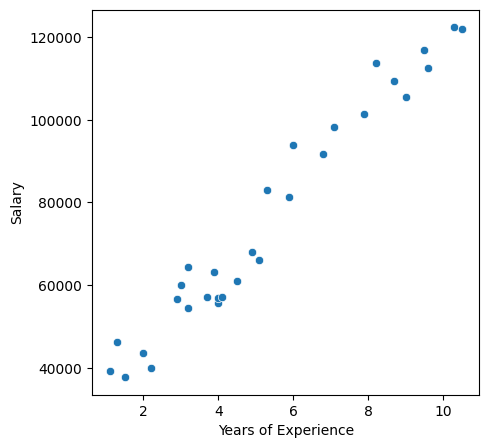

In [13]:
# Scatter Plot
scatter_plot_df = spark_df.toPandas()

plt.figure(figsize=(5,5))
sns.scatterplot(x="YearsExperience",y="Salary",data=scatter_plot_df)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

# Display plot
plt.show()



# Training Model

Define necessary libraries

In [14]:
from pyspark.ml.feature import StandardScaler , VectorAssembler
from pyspark.ml import Pipeline

Implementing Standard Scaler on dataset

In [15]:
assemblers = VectorAssembler(inputCols=['YearsExperience'],outputCol='feature')
scaler = StandardScaler(inputCol='feature',outputCol="Scaled_feature", withStd=True, withMean=True)
pipeline = Pipeline(stages=(assemblers,scaler))
scaled_df = pipeline.fit(spark_df).transform(spark_df)

scaled_df.show()

+---------------+-------+-------+--------------------+
|YearsExperience| Salary|feature|      Scaled_feature|
+---------------+-------+-------+--------------------+
|            1.1|39343.0|  [1.1]|[-1.484672086867381]|
|            1.3|46205.0|  [1.3]|[-1.4141971460350...|
|            1.5|37731.0|  [1.5]|[-1.3437222052027...|
|            2.0|43525.0|  [2.0]|[-1.1675348531219...|
|            2.2|39891.0|  [2.2]|[-1.097059912289663]|
|            2.9|56642.0|  [2.9]|[-0.8503976193765...|
|            3.0|60150.0|  [3.0]|[-0.8151601489604...|
|            3.2|54445.0|  [3.2]|[-0.744685208128101]|
|            3.2|64445.0|  [3.2]|[-0.744685208128101]|
|            3.7|57189.0|  [3.7]|[-0.5684978560473...|
|            3.9|63218.0|  [3.9]|[-0.4980229152150...|
|            4.0|55794.0|  [4.0]|[-0.4627854447988...|
|            4.0|56957.0|  [4.0]|[-0.4627854447988...|
|            4.1|57081.0|  [4.1]|[-0.4275479743826...|
|            4.5|61111.0|  [4.5]|[-0.2865980927180...|
|         

Print columns

In [16]:
scaled_df.columns

['YearsExperience', 'Salary', 'feature', 'Scaled_feature']

In [17]:
import pyspark.sql.functions as F

Replacing Scaled columns with independent variables

In [18]:

scaled_df = scaled_df.withColumn("YearsExperience",F.col("Scaled_feature"))

scaled_df.show()

+--------------------+-------+-------+--------------------+
|     YearsExperience| Salary|feature|      Scaled_feature|
+--------------------+-------+-------+--------------------+
|[-1.484672086867381]|39343.0|  [1.1]|[-1.484672086867381]|
|[-1.4141971460350...|46205.0|  [1.3]|[-1.4141971460350...|
|[-1.3437222052027...|37731.0|  [1.5]|[-1.3437222052027...|
|[-1.1675348531219...|43525.0|  [2.0]|[-1.1675348531219...|
|[-1.097059912289663]|39891.0|  [2.2]|[-1.097059912289663]|
|[-0.8503976193765...|56642.0|  [2.9]|[-0.8503976193765...|
|[-0.8151601489604...|60150.0|  [3.0]|[-0.8151601489604...|
|[-0.744685208128101]|54445.0|  [3.2]|[-0.744685208128101]|
|[-0.744685208128101]|64445.0|  [3.2]|[-0.744685208128101]|
|[-0.5684978560473...|57189.0|  [3.7]|[-0.5684978560473...|
|[-0.4980229152150...|63218.0|  [3.9]|[-0.4980229152150...|
|[-0.4627854447988...|55794.0|  [4.0]|[-0.4627854447988...|
|[-0.4627854447988...|56957.0|  [4.0]|[-0.4627854447988...|
|[-0.4275479743826...|57081.0|  [4.1]|[-

Drop extra columns

In [19]:
scaled_df = scaled_df.drop("Scaled_feature","feature")

scaled_df.show()

+--------------------+-------+
|     YearsExperience| Salary|
+--------------------+-------+
|[-1.484672086867381]|39343.0|
|[-1.4141971460350...|46205.0|
|[-1.3437222052027...|37731.0|
|[-1.1675348531219...|43525.0|
|[-1.097059912289663]|39891.0|
|[-0.8503976193765...|56642.0|
|[-0.8151601489604...|60150.0|
|[-0.744685208128101]|54445.0|
|[-0.744685208128101]|64445.0|
|[-0.5684978560473...|57189.0|
|[-0.4980229152150...|63218.0|
|[-0.4627854447988...|55794.0|
|[-0.4627854447988...|56957.0|
|[-0.4275479743826...|57081.0|
|[-0.2865980927180...|61111.0|
|[-0.1456482110534...|67938.0|
|[-0.0751732702211...|66029.0|
|[-0.0046983293888...|83088.0|
|[0.20672649310811...|81363.0|
|[0.24196396352427...|93940.0|
+--------------------+-------+
only showing top 20 rows



Splitting data into train and test data

In [20]:
split_dataset = scaled_df.randomSplit([0.8,0.2],seed=42)
train_df = split_dataset[0]
test_df = split_dataset[1]

In [21]:
train_df.show()
test_df.show()

+--------------------+--------+
|     YearsExperience|  Salary|
+--------------------+--------+
|[-1.484672086867381]| 39343.0|
|[-1.4141971460350...| 46205.0|
|[-1.1675348531219...| 43525.0|
|[-1.097059912289663]| 39891.0|
|[-0.8503976193765...| 56642.0|
|[-0.744685208128101]| 54445.0|
|[-0.5684978560473...| 57189.0|
|[-0.4980229152150...| 63218.0|
|[-0.4627854447988...| 55794.0|
|[-0.4627854447988...| 56957.0|
|[-0.2865980927180...| 61111.0|
|[-0.1456482110534...| 67938.0|
|[-0.0751732702211...| 66029.0|
|[-0.0046983293888...| 83088.0|
|[0.20672649310811...| 81363.0|
|[0.5238637268535216]| 91738.0|
|[0.6295761381019901]| 98273.0|
|[0.9114759014312398]|101302.0|
| [1.193375664760489]|109431.0|
|[1.2990880760089576]|105582.0|
+--------------------+--------+
only showing top 20 rows

+--------------------+--------+
|     YearsExperience|  Salary|
+--------------------+--------+
|[-1.3437222052027...| 37731.0|
|[-0.8151601489604...| 60150.0|
|[-0.744685208128101]| 64445.0|
|[-0.427547974

Spliting data into different x and y coordinates

In [22]:
X_train = train_df.select('YearsExperience')
X_test = test_df.select('YearsExperience')

y_train = train_df.select("Salary")
y_test = test_df.select('Salary')

# Training Model

Training the linear regression model

In [23]:
from pyspark.ml.regression import LinearRegression

In [24]:
regr = LinearRegression(featuresCol='YearsExperience',labelCol='Salary',regParam=0.0, solver="normal")
regr_model = regr.fit(train_df)

23/07/24 20:09:13 WARN Instrumentation: [57aa16f2] regParam is zero, which might cause numerical instability and overfitting.
23/07/24 20:09:13 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/07/24 20:09:13 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/07/24 20:09:13 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [25]:
y_pred = regr_model.evaluate(test_df)
y_pred.predictions.show()

+--------------------+--------+------------------+
|     YearsExperience|  Salary|        prediction|
+--------------------+--------+------------------+
|[-1.3437222052027...| 37731.0| 39102.10106372216|
|[-0.8151601489604...| 60150.0| 53214.83877075366|
|[-0.744685208128101]| 64445.0|  55096.5371316912|
|[-0.4275479743826...| 57081.0|63564.179755910096|
|[0.24196396352427...| 93940.0| 81440.31418481667|
|[1.0171883126797079]|113812.0|102138.99615512951|
|[1.8276501322513006]|121872.0|123778.52730591116|
+--------------------+--------+------------------+



In [26]:
predictions = regr_model.transform(test_df)


# Evaluate Model Performance through performance Metrices 

import Regression evalaution library

In [27]:
from pyspark.ml.evaluation import RegressionEvaluator

Root mean square Error

In [28]:

evaluator = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 8242.206429271004


R squared 

In [29]:
evaluator_r2 = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print("R-squared value:", r2)


R-squared value: 0.9210277468769359


Mean square Error

In [30]:
evaluator_mse = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="mse")
mse = evaluator_mse.evaluate(predictions)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 67933966.82271627


Mean Absolute Error

In [31]:
evaluator_mae = RegressionEvaluator(labelCol="Salary", predictionCol="prediction", metricName="mae")
mae = evaluator_mae.evaluate(predictions)
print("Mean absolute Error (RMSE):", mae)

Mean absolute Error (RMSE): 7173.874554736054


Find Slope and Intercept of best fit line

In [32]:
slope_value = regr_model.coefficients
intercept_value = regr_model.intercept
print(slope_value)
print(intercept_value)

[26700.24747398986]
74979.81647893114


Stop spark Session

In [ ]:
spark.stop()